# task4 - Application of neural networks for data processing tasks

In [1]:
import random
import matplotlib.pyplot as plt
import torch as t
import seaborn as sns


## Generate 50 points and return a one-dimensional tensor

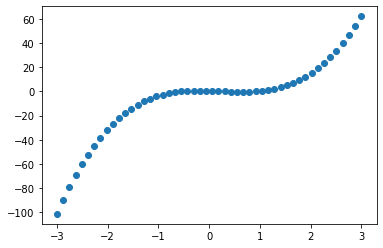

In [28]:

x = t.linspace(-3,3,50)  
y = -1.13*x-2.14*t.pow(x,2)+3.15*t.pow(x,3)-0.01*t.pow(x,4)+0.512
plt.scatter(x.data.numpy(),y.data.numpy())

### Connect the vectors together to form a matrix

In [29]:
def features(x):
    x = x.unsqueeze(1)
    return t.cat([x**i for i in range(1,5)],1)   

### matrix multiplication, denoted x*x_weight,b,item() to get the value in the b scalar

In [30]:
x_weight = t.Tensor([-1.13,-2.14,3.15,-0.01])
x_weight = x_weight.unsqueeze(1)
b = t.Tensor([0.512])
def target(x):
    return x.mm(x_weight)+b.item()   

### Create a new function that randomly generates input data and output data to generate train data

In [31]:

def get_data(batch_size):
    # 生成batch个随机的x
    batch_x = t.randn(batch_size)
    feature_x = features(batch_x)
    target_y = target(feature_x)
    return feature_x,target_y

# building 3 linear network

In [50]:
 model = torch.nn.Sequential(
    nn.Linear(4,120),
    torch.nn.ReLU(),
    nn.Linear(120,120),
    torch.nn.ReLU(),
    nn.Linear(120,1)
)

In [54]:
print(model)

Sequential(
  (0): Linear(in_features=4, out_features=120, bias=True)
  (1): ReLU()
  (2): Linear(in_features=120, out_features=120, bias=True)
  (3): ReLU()
  (4): Linear(in_features=120, out_features=1, bias=True)
)


In [62]:
import hiddenlayer as h
vis_graph = h.build_graph(model, batch_x)   # 获取绘制图像的对象
vis_graph.theme = h.graph.THEMES["blue"].copy()     # 指定主题颜色
# vis_graph.save("./demo1.png")  

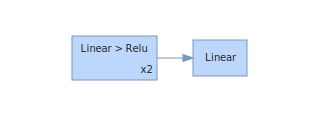

In [64]:
vis_graph

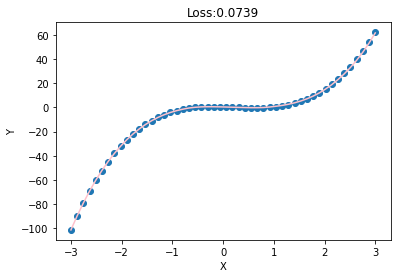

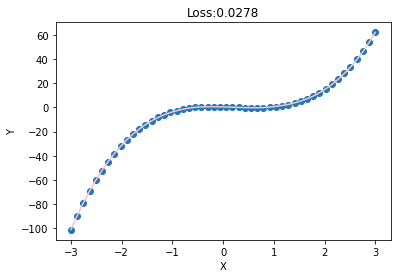

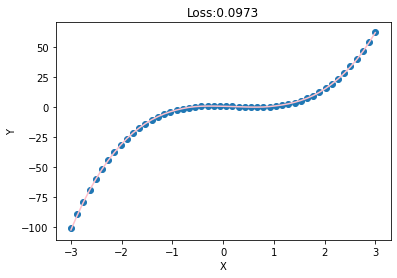

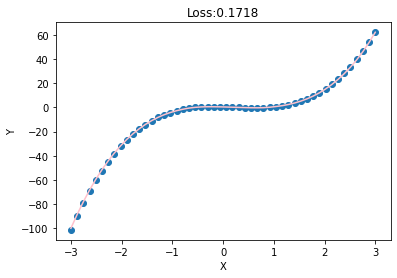

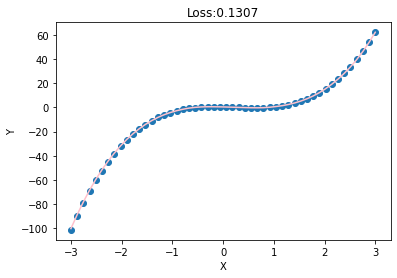

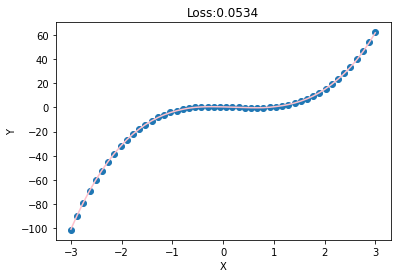

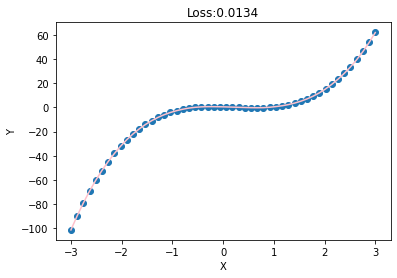

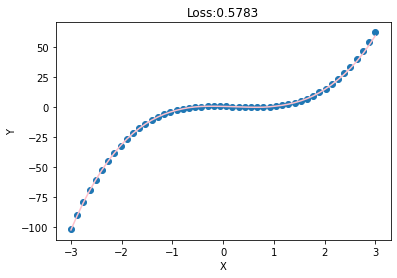

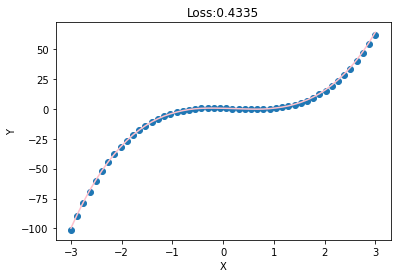

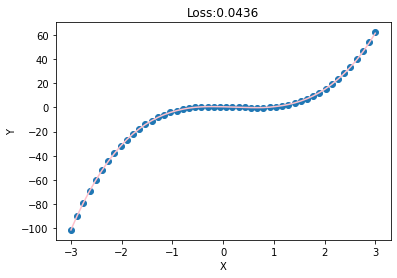

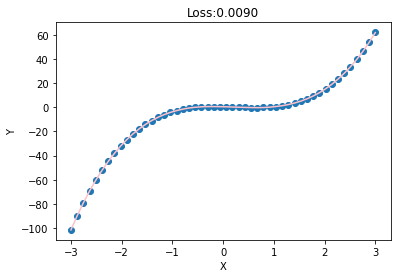

[-1.01469528e+02 -8.98212891e+01 -7.91100769e+01 -6.93028107e+01
 -6.03607407e+01 -5.22324753e+01 -4.48588562e+01 -3.81450958e+01
 -3.20750580e+01 -2.66999645e+01 -2.19467525e+01 -1.77713814e+01
 -1.41523218e+01 -1.09901562e+01 -8.31488132e+00 -6.07312012e+00
 -4.24330521e+00 -2.75416994e+00 -1.55093956e+00 -6.09788775e-01
  1.65921748e-02  4.03714597e-01  5.80193400e-01  5.87028205e-01
  5.13774037e-01  3.93949628e-01  2.34030768e-01  6.06297404e-02
 -1.01168826e-01 -2.41582572e-01 -3.03593218e-01 -2.26862893e-01
  9.31897014e-02  6.32671237e-01  1.31296754e+00  2.26328278e+00
  3.51337242e+00  5.08617878e+00  6.99962854e+00  9.31561852e+00
  1.20793800e+01  1.53060169e+01  1.90379391e+01  2.33408585e+01
  2.81492271e+01  3.35305977e+01  3.95223274e+01  4.61768188e+01
  5.35908699e+01  6.18211899e+01]


In [71]:

epochs = 10000
batch_size = 32
# model = PloynomialRegression()
criterion = t.nn.MSELoss()
optimizer = t.optim.SGD(model.parameters(),0.001)
for epoch in range(epochs):
    batch_x,batch_y = get_data(batch_size)
    out = model(batch_x)
    loss = criterion(out,batch_y)
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()
    if(epoch%200==0):
        predict = model(features(x))
        plt.plot(x.data.numpy(),predict.squeeze(1).data.numpy(),"pink")
        loss = criterion(predict,y.unsqueeze(1))
        plt.title("Loss:{:.4f}".format(loss.item()))
        plt.xlabel("X")
        plt.ylabel("Y")
        plt.scatter(x,y)
        plt.show()
        if loss.item() < 0.01:
            print(predict.squeeze(1).data.numpy())
            break
            

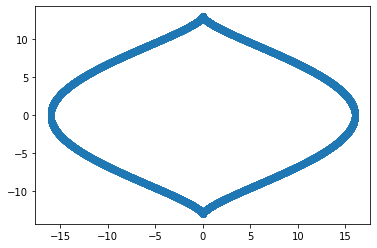

In [72]:
e = t.linspace(-15,15,10000)  
x1 = 16*t.sin(e)**3
y1 = 13*t.cos(e)

plt.scatter(x1.data.numpy(),y1.data.numpy())

In [77]:
def fea_x(e):
    e = e.unsqueeze(1)
    return t.sin(e)**3
def fea_y(e):
    e = e.unsqueeze(1)
    return t.cos(e)

In [86]:
def data(size):
    r = t.randn(size)
    x_fea = fea_x(r)
    y_fea = fea_y(r)

    x_tg = 16*x_fea
    y_tg = 13*y_fea
    return x_fea,y_fea,x_tg,y_tg

In [87]:
class HeartModel_x(t.nn.Module):
    def __init__(self):
        super(HeartModel_x,self).__init__()
        self.heartx = t.nn.Linear(1,1)
    def forward(self,x):
        return self.heartx(x)
class HeartModel_y(t.nn.Module):
    def __init__(self):
        super(HeartModel_y,self).__init__()
        self.hearty = t.nn.Linear(1,1)
    def forward(self,x):  #self必须是任意函数的首个参数
        return self.hearty(x)

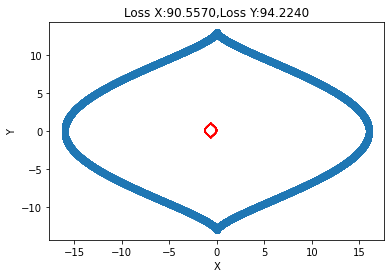

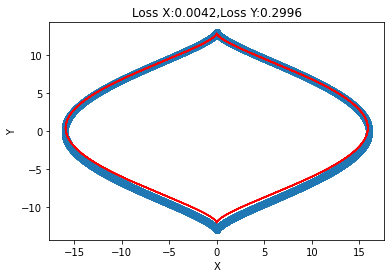

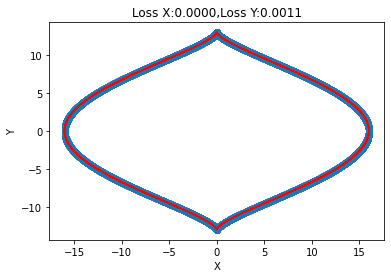

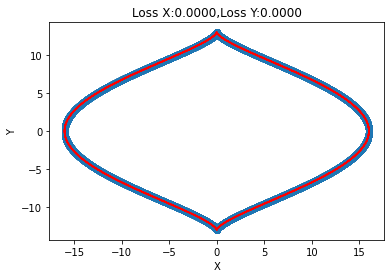

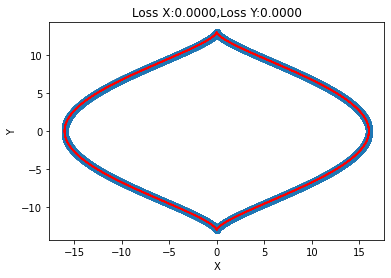

In [88]:
epoachs = 50000
batch_size = 10000
model_x = HeartModel_x()
model_y = HeartModel_y()
criterion = t.nn.MSELoss()
optimizer1 = t.optim.SGD(model_x.parameters(),0.001)
optimizer2 = t.optim.SGD(model_y.parameters(),0.001)

for epoach in range(epoachs):
    x_train,y_train,x_target,y_target = data(batch_size)
    out_x = model_x(x_train)
    out_y = model_y(y_train)
    
    loss_x = criterion(out_x,x_target)
    loss_y = criterion(out_y,y_target)
    
    optimizer1.zero_grad()
    optimizer2.zero_grad()
    
    loss_x.backward()
    loss_y.backward()
    
    optimizer1.step()
    optimizer2.step()
    
    if(epoach%10000==0):
        predict_x = model_x(fea_x(e))
        predict_y = model_y(fea_y(e))
        plt.plot(predict_x.squeeze(1).data.numpy(),predict_y.squeeze(1).data.numpy(),"red")
        loss_x = criterion(predict_x,x1.unsqueeze(1))
        loss_y = criterion(predict_y,y1.unsqueeze(1))
        plt.title("Loss X:{:.4f},Loss Y:{:.4f}".format(loss_x,loss_y))
        plt.xlabel("X")
        plt.ylabel("Y")
        plt.scatter(x1,y1)
        plt.show()